In [25]:
import numpy as np
from PIL import Image
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

import tensorflow as tf

%matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

In [26]:
y, cb, cr = Image.open('images/earth-32.png').convert('YCbCr').split()

In [27]:
im = np.array(y, dtype=np.float64)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

Text(0.5, 1.0, 'Original image in graymap')

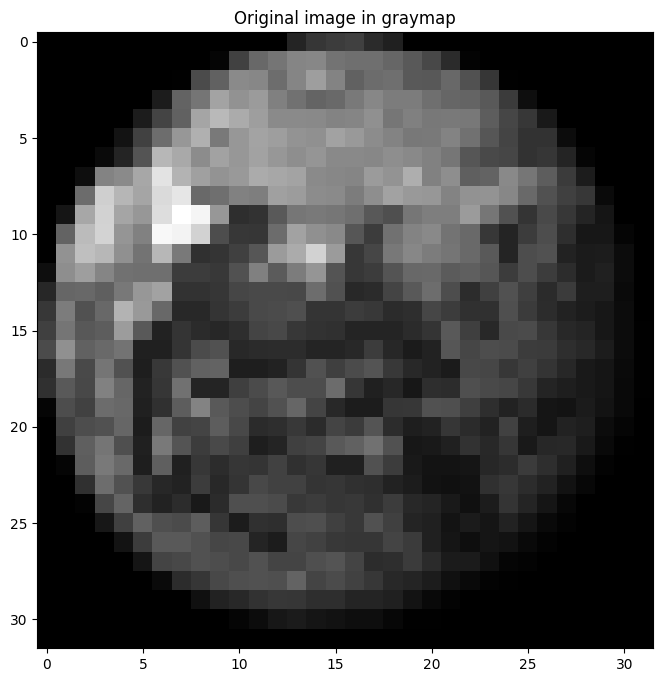

In [28]:
plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

In [29]:
dct = np.zeros(im.shape)

for i in range(im.shape[0]):
    dct[i] = np.array(tf.signal.mdct(im[i], 
        frame_length=16,
        window_fn=tf.signal.kaiser_bessel_derived_window,
        pad_end=True,
        norm='ortho'
    )).ravel()

for i in range(dct.shape[1]):
    dct[:, i] = np.array(tf.signal.mdct(dct[:, i], 
        frame_length=16,
        window_fn=tf.signal.kaiser_bessel_derived_window,
        pad_end=True,
        norm='ortho'
    )).ravel()

Text(0.5, 1.0, 'Image mDCT in graymap')

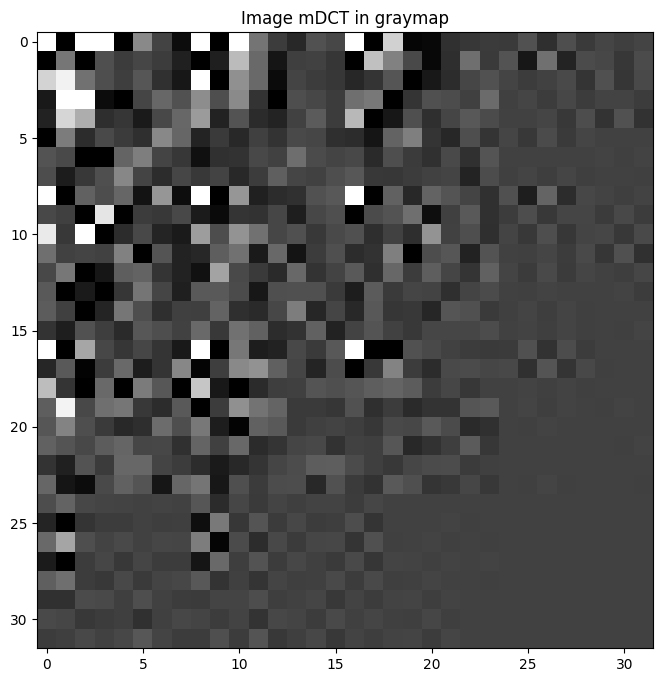

In [30]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.1, vmin=np.min(dct)*0.1)
plt.title("Image mDCT in graymap")

In [31]:
dct_mask = np.zeros((8, 8))

dct_mask = np.array([
    [1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
])

dct_mask = np.ones((8, 8))

for i in np.r_[:dct.shape[0]:8]:
    for j in np.r_[:dct.shape[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct[i:(i+8), j:(j+8)] * dct_mask

Text(0.5, 1.0, 'Modified imageDCTs in graymap')

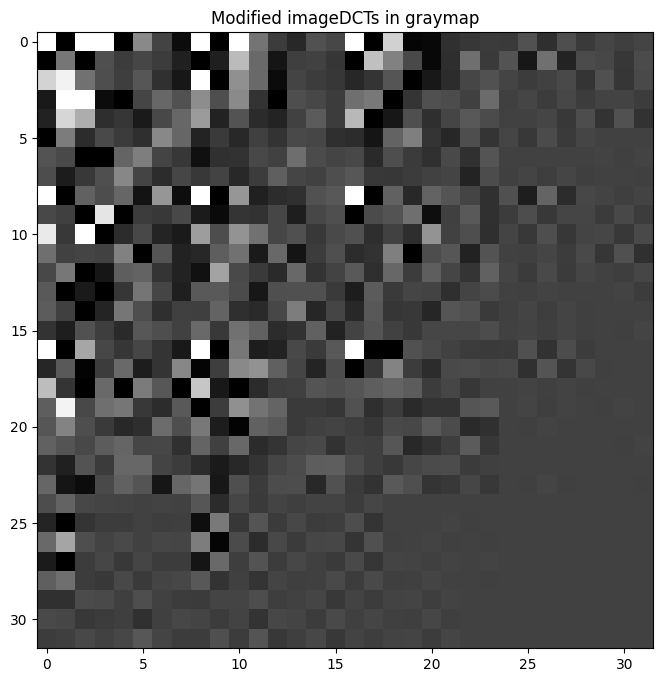

In [32]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.1, vmin=np.min(dct)*0.1)
plt.title("Modified imageDCTs in graymap")

In [33]:
rec = np.zeros(im.shape)

for i in range(dct.shape[1]):
    rec[:, i] = np.array(tf.signal.inverse_mdct(dct[:, i], 
        frame_length=16,
        window_fn=tf.signal.kaiser_bessel_derived_window,
        pad_end=True,
        norm='ortho'
    )).ravel()

for i in range(im.shape[0]):
    rec[i] = np.array(tf.signal.inverse_mdct(rec[i], 
        frame_length=16,
        window_fn=tf.signal.kaiser_bessel_derived_window,
        pad_end=True,
        norm='ortho'
    )).ravel()

TypeError: Got an unexpected keyword argument 'frame_length'

Text(0.5, 1.0, 'Reconstructed image in graymap')

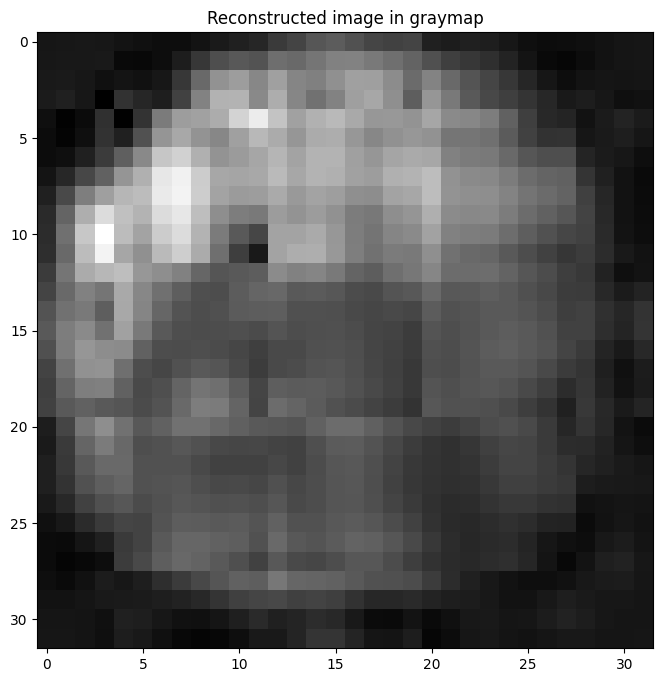

In [ ]:
plt.figure()
plt.imshow(rec, cmap='gray')
plt.title("Reconstructed image in graymap")

In [ ]:
np.allclose(im, rec)

False

Text(0.5, 1.0, 'Original image vs reconstructed. No windowing.')

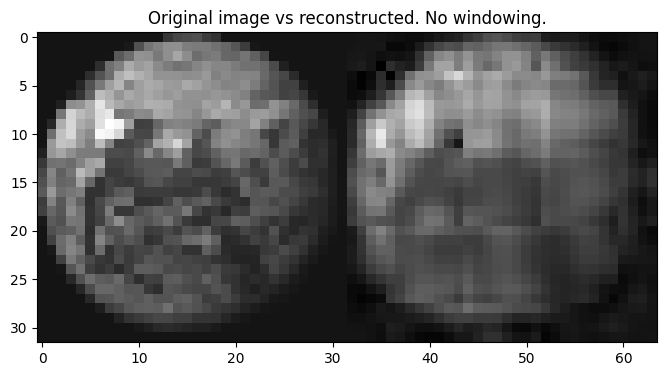

In [ ]:
plt.figure()
plt.imshow(np.hstack([im, rec]), cmap='gray')
plt.imsave(f'window-tf.png', np.hstack([im, rec]), cmap='gray')
plt.title("Original image vs reconstructed. No windowing.")

In [ ]:
np.abs(im - rec).max()

55.51219196723079